# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

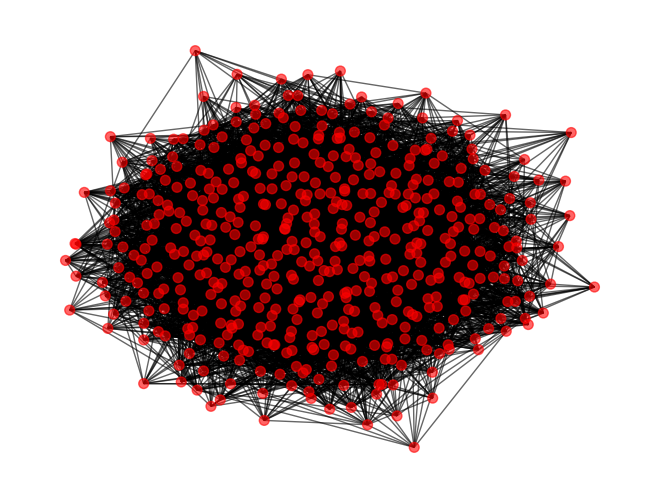

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/500-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  500 nodes, density:  0.05058917835671343


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{3,
 4,
 5,
 9,
 10,
 11,
 14,
 15,
 17,
 20,
 21,
 22,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 39,
 40,
 44,
 45,
 46,
 47,
 53,
 54,
 55,
 56,
 57,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 75,
 80,
 83,
 84,
 86,
 91,
 92,
 95,
 100,
 101,
 102,
 105,
 109,
 112,
 121,
 130,
 132,
 133,
 135,
 138,
 141,
 143,
 145,
 148,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 162,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 173,
 174,
 176,
 178,
 180,
 181,
 182,
 183,
 184,
 185,
 188,
 191,
 192,
 193,
 194,
 195,
 198,
 199,
 200,
 205,
 209,
 210,
 211,
 214,
 216,
 217,
 219,
 222,
 223,
 224,
 231,
 233,
 234,
 235,
 236,
 238,
 240,
 241,
 242,
 245,
 246,
 249,
 254,
 258,
 260,
 261,
 263,
 264,
 266,
 267,
 269,
 275,
 276,
 277,
 279,
 281,
 283,
 289,
 290,
 291,
 292,
 293,
 299,
 300,
 301,
 302,
 304,
 305,
 306,
 308,
 310,
 313,
 315,
 316,
 319,
 320,
 323,
 324,
 326,
 327,
 328,
 329,
 333,
 334,
 335,
 336,
 337,
 338,
 340,
 344,
 347,
 349,
 350,
 352

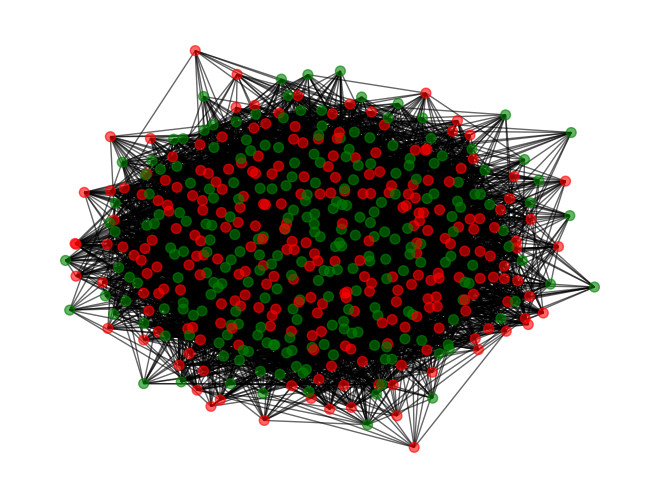

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  4071
